In [0]:
from numpy import random
import matplotlib.pyplot as plt
import numpy as np

## 現象の元となる関数

### parameters
a, b, c: 曲線を決定するパラメータ  
target_min, target_max: 対象とする範囲

   3     2
1 x - 6 x + 11 x - 6


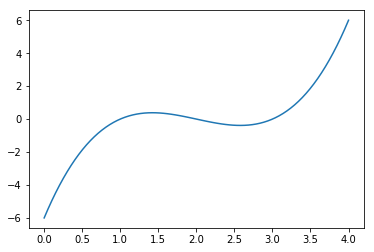

In [2]:
a = 1.0
b = 2.0
c = 3.0

target_min = 0.0
target_max = 4.0

f = np.poly1d([a, b, c], True)
x = np.linspace(target_min, target_max, int(target_max-target_min)*20)

print(f)
plt.plot(x,f(x))

## 観測されたノイズ込みの離散データ
ノイズはガウス分布に基づいて与えるものとした
### parameters
ave: ノイズの平均値  
sd: ノイズの標準偏差  
data_N: 観測できたデータ点数  

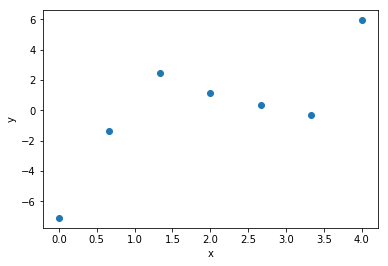

In [3]:
ave = 0.0
sd = 1.0
data_N = 7

y=[]
data_x = np.linspace(target_min, target_max, data_N)
for i in range(len(f(data_x))):
    y.append(f(data_x)[i] + random.normal(loc=0.0, scale=1.0))

plt.xlabel("x")
plt.ylabel("y")
plt.scatter(data_x, y);

## 最小二乗法での多項式曲線フィッティング
### parameters
order: フィッティングする多項式の最大次数

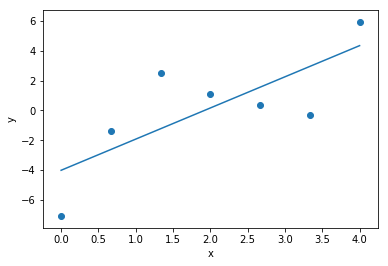

In [4]:
order = 1

estimated_parameters = np.polyfit(data_x, y, order)
estimated_curve = np.poly1d(estimated_parameters)

plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, estimated_curve(x))
plt.scatter(data_x, y);

## 性能確認
平均二乗誤差を計算

In [5]:
rate = int(data_N / (target_max-target_min)*20)

square_error = 0
for i in range(data_N):
    square_error += (estimated_curve[int(rate*i)] - y[i]) ** 2
mse = square_error / data_N
print(mse)

7.725099891697679
